In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pybt
from matplotlib.patches import Ellipse, Rectangle

In [2]:
initial = pd.read_hdf('initial_pregenerated_particles.hdf')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


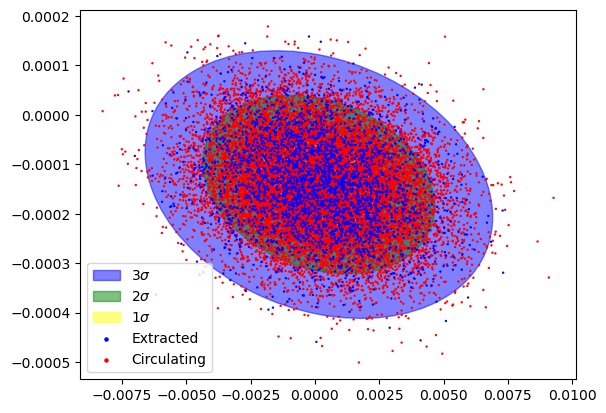

In [49]:
fig, ax = plt.subplots()
particles_after = pd.read_parquet('gain_0.1/1/particles.parquet')
cmap = mpl.cm.get_cmap('bwr')
norm = mpl.colors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sctr = ax.scatter(initial['x'], initial['px'], c=particles_after.state, zorder=3, cmap=cmap, s=.5)
cov = np.cov([initial.x, initial.px])
cov_px = np.cov(initial.px)

w3, h3, r3 = pybt.tools.particles.ellipse_frm_cov(cov, nsig=3)
w2, h2, r2 = pybt.tools.particles.ellipse_frm_cov(cov, nsig=2)
w1, h1, r1 = pybt.tools.particles.ellipse_frm_cov(cov, nsig=1)

x0 = initial.x.mean()
px0 = initial.px.mean()

e3 = Ellipse(xy=(x0, px0), width=w3, height=h3, angle=r3, color='blue', alpha=.5, label='3$\sigma$')
e2 = Ellipse(xy=(x0, px0), width=w2, height=h2, angle=r2, color='green', alpha=.5, label='2$\sigma$')
e1 = Ellipse(xy=(x0, px0), width=w1, height=h1, angle=r1, color='yellow', alpha=.5, label='1$\sigma$')

ax.add_artist(e3)
ax.add_artist(e2)
ax.add_artist(e1)

ax.scatter(0, 0, c=cmap(norm(0)), cmap=cmap, label="Extracted", s=5)
ax.scatter(0, 0, c=cmap(norm(1)), cmap=cmap, label="Circulating", s=5)

ax.plot()
ax.legend()